# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def is_shattered(S, do_plot=False, kernel="linear"):
    model = SVC(C=10000, shrinking=False, kernel=kernel, tol=1e-5)
    for num in itertools.product([0, 1], repeat=S.shape[0]):
        if np.sum(num) == len(num) or np.sum(num) == 0:
            continue
        y = np.array(num)
        model.fit(S, y)
        if do_plot:
            assert S.shape[1] == 2
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].scatter(S.T[0], S.T[1], c=y)
            ax[0].set_title('True')
            ax[1].scatter(S.T[0], S.T[1], c=model.predict(S))
            ax[1].set_title('Pred')
            plt.show()
        if accuracy_score(y, model.predict(S)) < 1:
            return False
    return True

In [3]:
S = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#I skip situations where all points are assigned to one class as it is trivial
is_shattered(S)

False

### c)

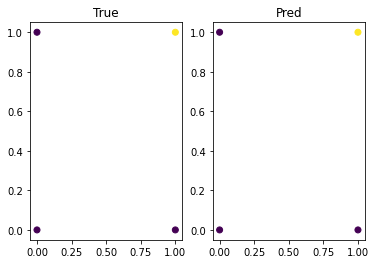

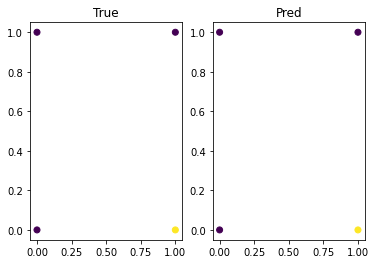

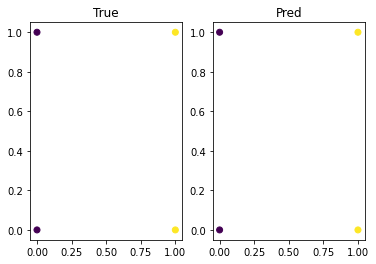

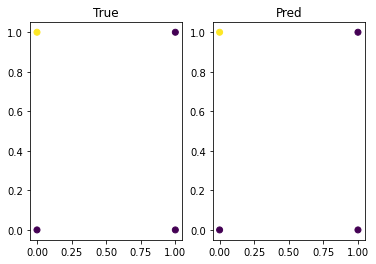

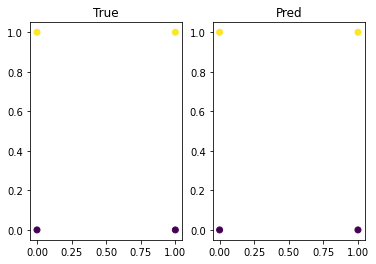

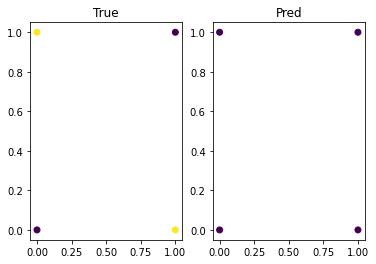

False

In [4]:
is_shattered(S, do_plot=True)

### d)

In [7]:
N_sets = 50
N_dim = 13
d_dim_up = 10
d_dim_down = 2
d_counts = []
for d in range(d_dim_down, d_dim_up+1):
    counts = []
    for n in tqdm(range(1, N_dim+1), f"d:{d}"):
        _S = np.random.rand(N_sets, n, d)
        is_shat = False
        for S in _S:
            if is_shattered(S):
                is_shat = True
                break
        counts.append(is_shat)
        if not is_shat:
            break
    d_counts.append(counts)

d:10:  85%|████████████████████████████████████████████████████████████████▎           | 11/13 [00:28<00:05,  2.60s/it]


In [8]:
VC = [len(count) for count in d_counts]

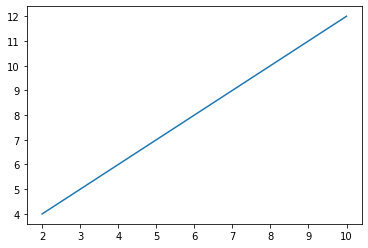

In [9]:
plt.plot(np.linspace(2, len(VC)+1, len(VC)), VC)
plt.show()

From lecture: "VC dimension of family of hyperplanes equals d + 2" what is confirmed by the plot above.

### e)

In [10]:
S = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
is_shattered(S, kernel="rbf")

In [11]:
N_sets = 50
N_dim = 13
d_dim_up = 10
d_dim_down = 2
d_counts = []
for d in range(d_dim_down, d_dim_up+1):
    counts = []
    for n in tqdm(range(1, N_dim+1), f"d:{d}"):
        _S = np.random.rand(N_sets, n, d)
        is_shat = False
        for S in _S:
            if is_shattered(S, kernel="rbf"):
                is_shat = True
                break
        counts.append(is_shat)
        if not is_shat:
            break
    d_counts.append(counts)